<a href="https://colab.research.google.com/github/omkar123katare/Capstone_2_Retail_sales_prediction/blob/main/retail_sales__predicton_capstone_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <b><u> Project Title : Sales Prediction : Predicting sales of a major store chain Rossmann</u></b>

## <b> Problem Description </b>

### Rossmann operates over 3,000 drug stores in 7 European countries. Currently, Rossmann store managers are tasked with predicting their daily sales for up to six weeks in advance. Store sales are influenced by many factors, including promotions, competition, school and state holidays, seasonality, and locality. With thousands of individual managers predicting sales based on their unique circumstances, the accuracy of results can be quite varied.

### You are provided with historical sales data for 1,115 Rossmann stores. The task is to forecast the "Sales" column for the test set. Note that some stores in the dataset were temporarily closed for refurbishment.

## <b> Data Description </b>

### <b>Rossmann Stores Data.csv </b> - historical data including Sales
### <b>store.csv </b> - supplemental information about the stores


### <b><u>Data fields</u></b>
### Most of the fields are self-explanatory. The following are descriptions for those that aren't.

* #### Id - an Id that represents a (Store, Date) duple within the test set
* #### Store - a unique Id for each store
* #### Sales - the turnover for any given day (this is what you are predicting)
* #### Customers - the number of customers on a given day
* #### Open - an indicator for whether the store was open: 0 = closed, 1 = open
* #### StateHoliday - indicates a state holiday. Normally all stores, with few exceptions, are closed on state holidays. Note that all schools are closed on public holidays and weekends. a = public holiday, b = Easter holiday, c = Christmas, 0 = None
* #### SchoolHoliday - indicates if the (Store, Date) was affected by the closure of public schools
* #### StoreType - differentiates between 4 different store models: a, b, c, d
* #### Assortment - describes an assortment level: a = basic, b = extra, c = extended
* #### CompetitionDistance - distance in meters to the nearest competitor store
* #### CompetitionOpenSince[Month/Year] - gives the approximate year and month of the time the nearest competitor was opened
* #### Promo - indicates whether a store is running a promo on that day
* #### Promo2 - Promo2 is a continuing and consecutive promotion for some stores: 0 = store is not participating, 1 = store is participating
* #### Promo2Since[Year/Week] - describes the year and calendar week when the store started participating in Promo2
* #### PromoInterval - describes the consecutive intervals Promo2 is started, naming the months the promotion is started anew. E.g. "Feb,May,Aug,Nov" means each round starts in February, May, August, November of any given year for that store

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [55]:
# import important library 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pylab
from scipy import stats
import warnings
warnings.filterwarnings('ignore')

In [57]:

# import rossman store data from drive 
rossmann_store_data=pd.read_csv('/content/drive/MyDrive/Data Science Projects-AlmaBetter/Capstone_2_store_sales_prediction/Rossmann Stores Data.csv')
# import store data from drive 
store_df= pd.read_csv("/content/drive/MyDrive/Data Science Projects-AlmaBetter/Capstone_2_store_sales_prediction/store.csv")

In [58]:
# to check shape of both data which gives number of rows and columns in each data 
rossmann_store_data.shape, store_df.shape

((1017209, 9), (1115, 10))

# Data overview

# Data Cleaning

In [59]:
# to check null values in store data
store_df.isnull().sum()

Store                          0
StoreType                      0
Assortment                     0
CompetitionDistance            3
CompetitionOpenSinceMonth    354
CompetitionOpenSinceYear     354
Promo2                         0
Promo2SinceWeek              544
Promo2SinceYear              544
PromoInterval                544
dtype: int64

In [60]:
# fill null values with 0 
store_df= store_df.fillna(0)
# check null values after treatment of null values wheather it removed or not
store_df.isnull().sum()

Store                        0
StoreType                    0
Assortment                   0
CompetitionDistance          0
CompetitionOpenSinceMonth    0
CompetitionOpenSinceYear     0
Promo2                       0
Promo2SinceWeek              0
Promo2SinceYear              0
PromoInterval                0
dtype: int64

In [68]:
# merge rossmann_store and store_data beacause Store column are same in both data
df=pd.merge(rossmann_store_data,store_df,how='left', on='Store')
# check shape of data
df.shape

(1017209, 18)

In [69]:
# check first five row
df.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,5,2015-07-31,5263,555,1,1,0,1,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0
1,2,5,2015-07-31,6064,625,1,1,0,1,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,5,2015-07-31,8314,821,1,1,0,1,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,5,2015-07-31,13995,1498,1,1,0,1,c,c,620.0,9.0,2009.0,0,0.0,0.0,0
4,5,5,2015-07-31,4822,559,1,1,0,1,a,a,29910.0,4.0,2015.0,0,0.0,0.0,0


In [70]:
# check last 5 rows
df.tail()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
1017204,1111,2,2013-01-01,0,0,0,0,a,1,a,a,1900.0,6.0,2014.0,1,31.0,2013.0,"Jan,Apr,Jul,Oct"
1017205,1112,2,2013-01-01,0,0,0,0,a,1,c,c,1880.0,4.0,2006.0,0,0.0,0.0,0
1017206,1113,2,2013-01-01,0,0,0,0,a,1,a,c,9260.0,0.0,0.0,0,0.0,0.0,0
1017207,1114,2,2013-01-01,0,0,0,0,a,1,a,c,870.0,0.0,0.0,0,0.0,0.0,0
1017208,1115,2,2013-01-01,0,0,0,0,a,1,d,c,5350.0,0.0,0.0,1,22.0,2012.0,"Mar,Jun,Sept,Dec"


In [71]:
# check info about data
df.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 1017209 entries, 0 to 1017208
Data columns (total 18 columns):
 #   Column                     Non-Null Count    Dtype  
---  ------                     --------------    -----  
 0   Store                      1017209 non-null  int64  
 1   DayOfWeek                  1017209 non-null  int64  
 2   Date                       1017209 non-null  object 
 3   Sales                      1017209 non-null  int64  
 4   Customers                  1017209 non-null  int64  
 5   Open                       1017209 non-null  int64  
 6   Promo                      1017209 non-null  int64  
 7   StateHoliday               1017209 non-null  object 
 8   SchoolHoliday              1017209 non-null  int64  
 9   StoreType                  1017209 non-null  object 
 10  Assortment                 1017209 non-null  object 
 11  CompetitionDistance        1017209 non-null  float64
 12  CompetitionOpenSinceMonth  1017209 non-null  float64
 13  CompetitionO

In [74]:
# converting date coulmn into year , month and date
df['Date'] = pd.to_datetime(df['Date'])
df['Promo2SinceYear']= pd.to_datetime(df['Promo2SinceYear'])

df['year_of_sales'] =  df['Date'].dt.year 
df['month_of_sales'] =  df['Date'].dt.month.astype(int)
df['day_of_sales'] =  df['Date'].dt.day.astype(int)
df['Promo2SinceYear'] =  df['Promo2SinceYear'].dt.year.astype(int)

In [73]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1017209 entries, 0 to 1017208
Data columns (total 21 columns):
 #   Column                     Non-Null Count    Dtype         
---  ------                     --------------    -----         
 0   Store                      1017209 non-null  int64         
 1   DayOfWeek                  1017209 non-null  int64         
 2   Date                       1017209 non-null  datetime64[ns]
 3   Sales                      1017209 non-null  int64         
 4   Customers                  1017209 non-null  int64         
 5   Open                       1017209 non-null  int64         
 6   Promo                      1017209 non-null  int64         
 7   StateHoliday               1017209 non-null  object        
 8   SchoolHoliday              1017209 non-null  int64         
 9   StoreType                  1017209 non-null  object        
 10  Assortment                 1017209 non-null  object        
 11  CompetitionDistance        1017209 no

In [75]:
# drop Date column as we extract dfferent columns from Data
df.drop('Date',inplace=True,axis=1)
#Checking head again 
df.head()

,Store,DayOfWeek,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval,year_of_sales,month_of_sales,day_of_sales
0,1,5,5263,555,1,1,0,1,c,a,1270.0,9.0,2008.0,0,0.0,1970,0,2015,7,31
1,2,5,6064,625,1,1,0,1,a,a,570.0,11.0,2007.0,1,13.0,1970,"Jan,Apr,Jul,Oct",2015,7,31
2,3,5,8314,821,1,1,0,1,a,a,14130.0,12.0,2006.0,1,14.0,1970,"Jan,Apr,Jul,Oct",2015,7,31
3,4,5,13995,1498,1,1,0,1,c,c,620.0,9.0,2009.0,0,0.0,1970,0,2015,7,31
4,5,5,4822,559,1,1,0,1,a,a,29910.0,4.0,2015.0,0,0.0,1970,0,2015,7,31


# Exploratory Data Analysis

In [76]:
# to check year_of_sales column count 
df['year_of_sales'].value_counts().reset_index()

,index,year_of_sales
0,2013,406974
1,2014,373855
2,2015,236380


In [77]:
# relation between year of sales and total sales
year_of_sales_df=df.groupby(['year_of_sales'])['Sales'].sum().reset_index().rename(columns={'year_of_sales': 'Year'})
year_of_sales_df

,Year,Sales
0,2013,2302876084
1,2014,2180804896
2,2015,1389499643


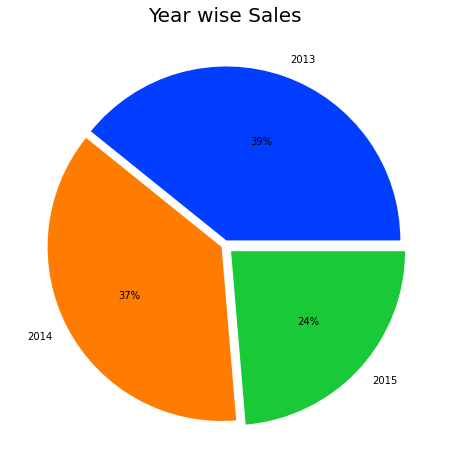

In [78]:
# show pie chart yearly sales
plt.figure(figsize=(10,8))                                          #setting fig size
plt.title('Year wise Sales',size = 20)                              # giving title name
explode = [0.03,0.02,0.05,]                             
colors = sns.color_palette('bright')                               # Seaborn color palette to plot pie chart
plt.pie(year_of_sales_df.Sales, labels=year_of_sales_df.Year, colors=colors,autopct='%.0f%%',explode = explode);

In [79]:
#relation between year in month of  total sales 
month_of_sales_df=df.groupby(['year_of_sales','month_of_sales'])['Sales'].sum().reset_index()
month_of_sales_df

,year_of_sales,month_of_sales,Sales
0,2013,1,180132207
1,2013,2,171534275
2,2013,3,201180369
3,2013,4,183431432
4,2013,5,185411063
5,2013,6,180702351
6,2013,7,208843882
7,2013,8,198042727
8,2013,9,178053963
9,2013,10,187662330


Text(0.5, 1.0, 'Distribution of sales by month in year ')

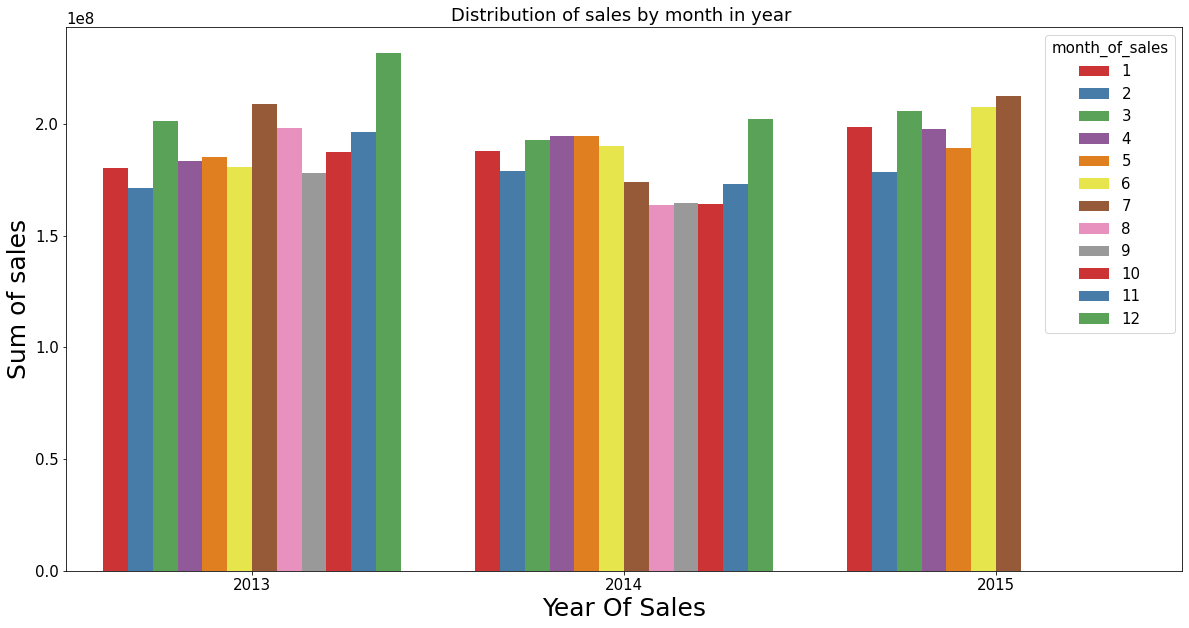

In [80]:

# show grouped bar graph year in monthly total sales(in million)
plt.figure(figsize=(20,10))
plt.rcParams['font.size'] = '15'
sns.barplot(x="year_of_sales",
           y="Sales",
           hue="month_of_sales",
           data=month_of_sales_df,palette='Set1')
plt.xlabel('Year Of Sales', size=25)
plt.ylabel('Sum of sales', size=25)
plt.title('Distribution of sales by month in year ')

In [81]:
# define categorical feature for shwoing relationship bewteen sales
categorical_features = df.describe(include=['object','category']).columns
categorical_features

Index(['StateHoliday', 'StoreType', 'Assortment', 'PromoInterval'], dtype='object')

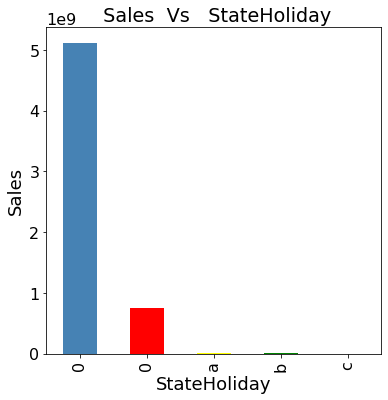

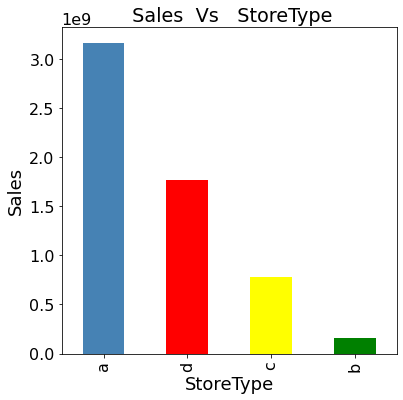

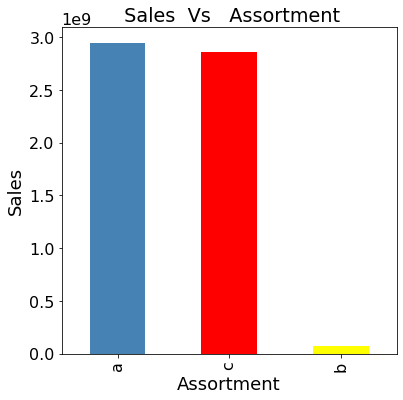

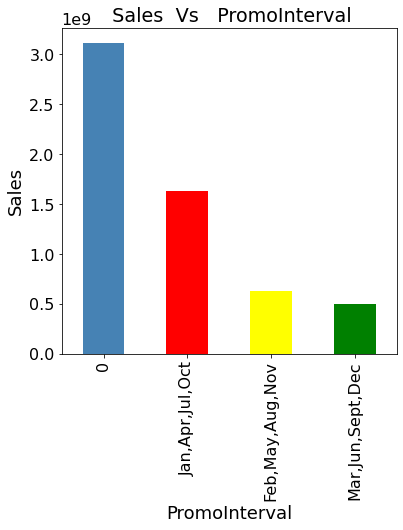

In [82]:
# bar graph representation of categorical feature with Sales
for col in categorical_features:
    counts = df.groupby([col])['Sales'].sum().sort_values(ascending = False)
    fig = plt.figure(figsize=(6,6))
    plt.rcParams['font.size'] = '16'

    ax = fig.gca()
    counts.plot.bar(ax = ax, color=['steelblue','red','yellow','green'])
    ax.set_title( ' Sales  Vs   '   +   col )
    ax.set_xlabel(col,fontsize=18) 
    ax.set_ylabel("Sales",fontsize=18)

In [83]:
# converting data type into integer
df['CompetitionOpenSinceYear']=df['CompetitionOpenSinceYear'].astype(int)
df['CompetitionOpenSinceMonth']=df['CompetitionOpenSinceMonth'].astype(int)
df['Promo2SinceWeek']=df['Promo2SinceWeek'].astype(int)

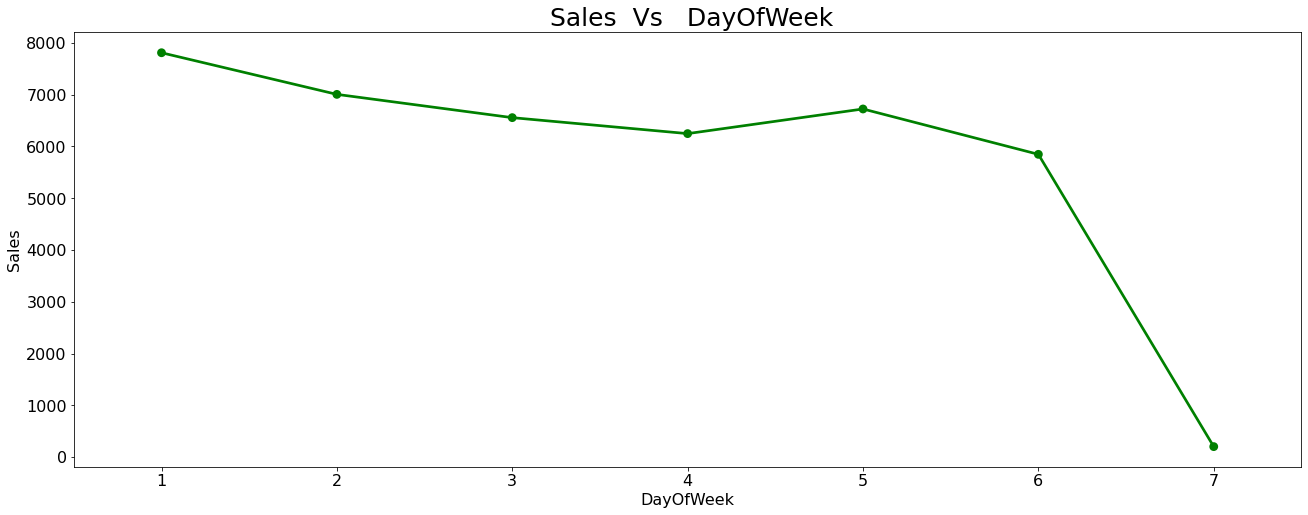

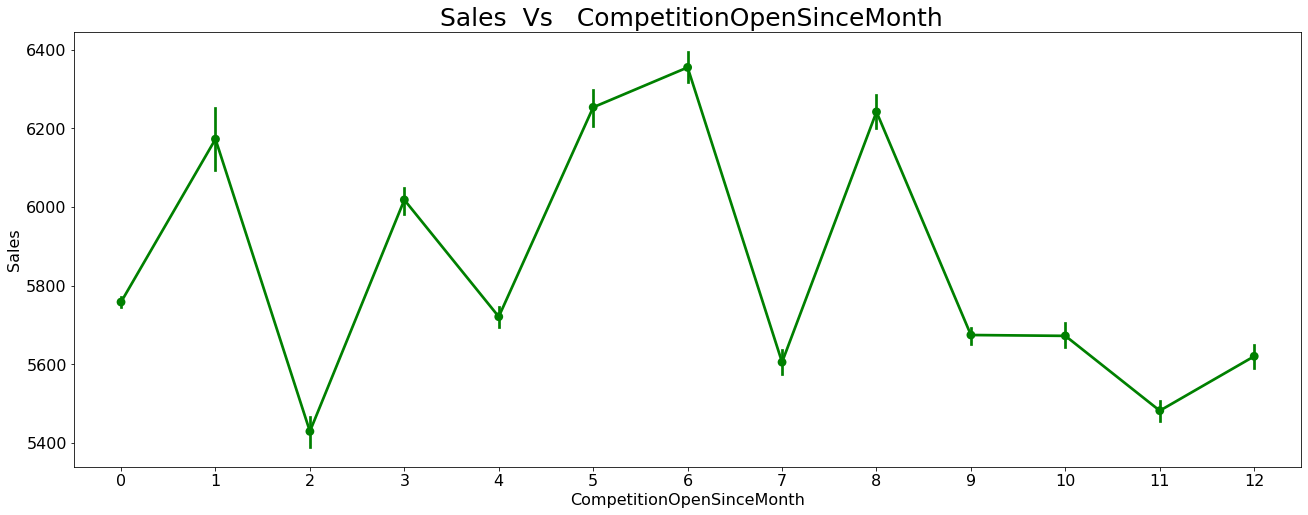

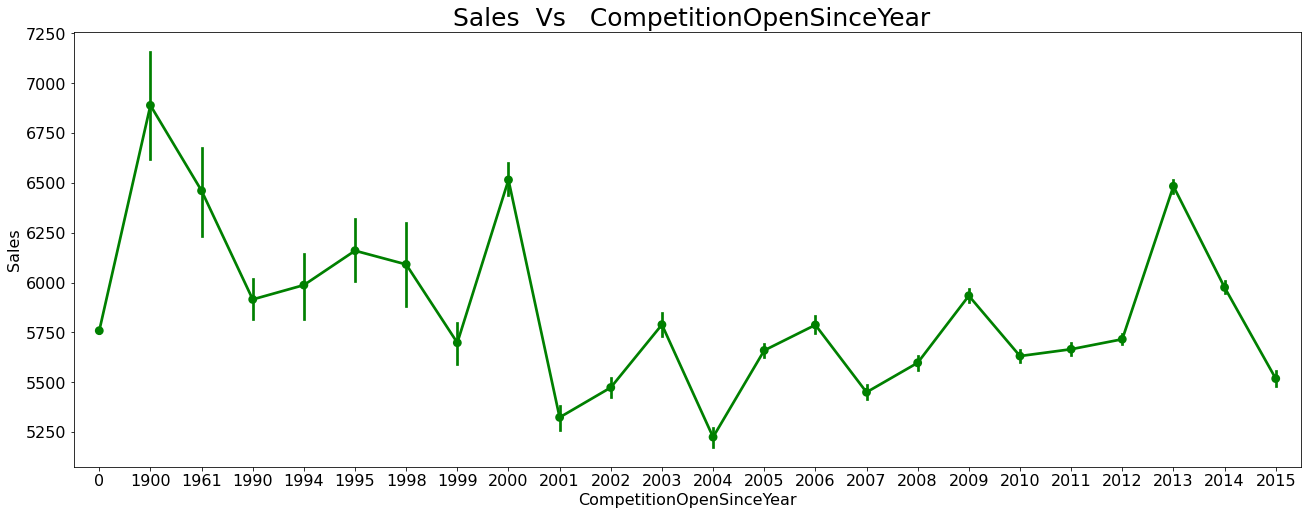

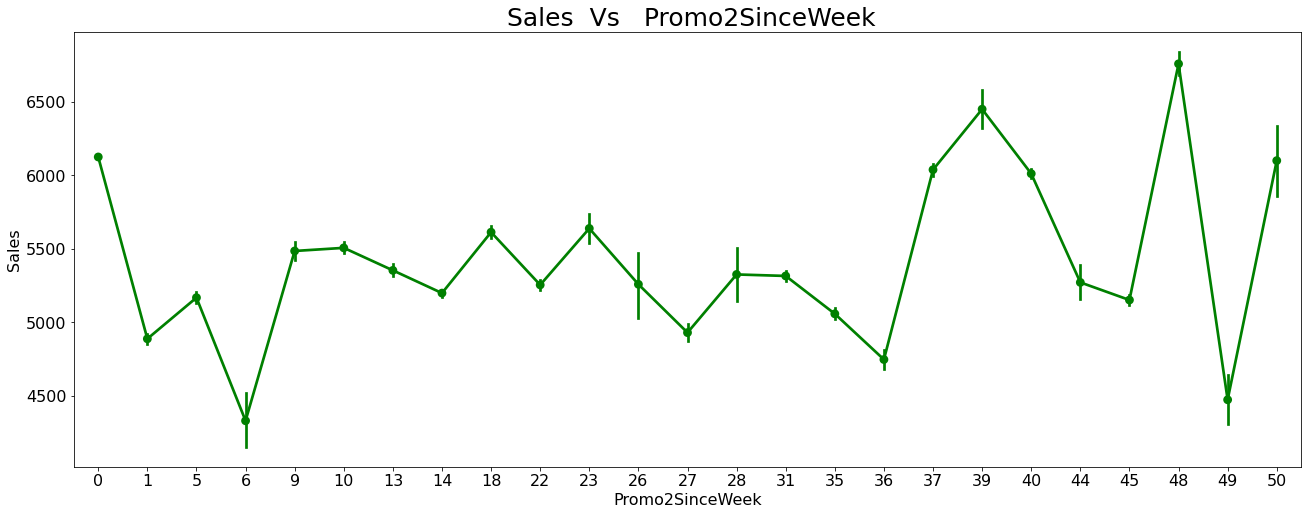

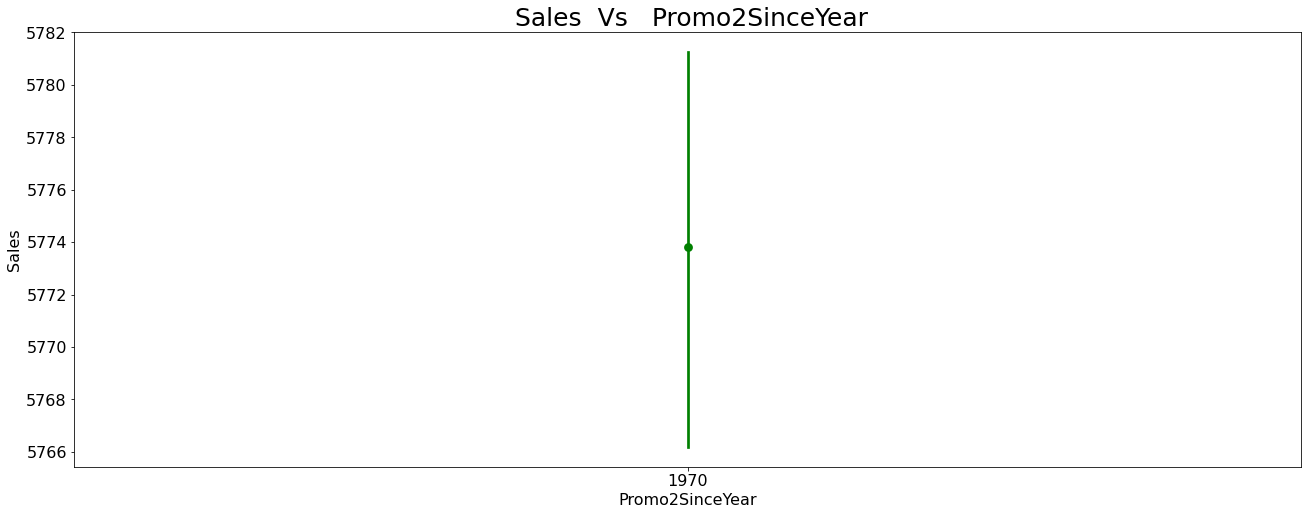

In [84]:
# define new_col as variable which contain some important numerical features
new_col=['DayOfWeek','CompetitionOpenSinceMonth','CompetitionOpenSinceYear','Promo2SinceWeek','Promo2SinceYear']
# line grpah show relationship between Sales and new_col features
for i in new_col:
   plt.figure(figsize = (22,8))
   plt.rcParams['font.size'] = '16'
   sns.pointplot(x=i,y = df['Sales'],data = df,color='g')
   plt.title(' Sales  Vs   '   +   i, size=25)

Text(0.5, 1.0, 'Average Sales per Store Type')

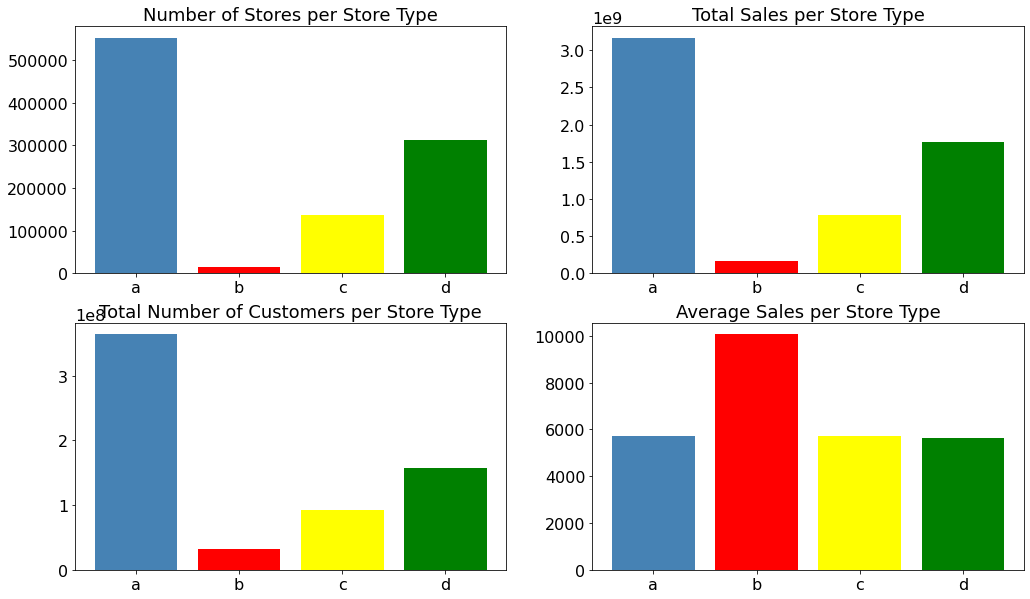

In [85]:
store_count=df.groupby('StoreType')['StoreType'].count()                      #using groupby to get the count of store type
sales_per_store = df.groupby('StoreType')['Sales'].sum()                      #using groupby to get the sum of sales per store  
customers_per_store = df.groupby('StoreType')['Customers'].sum()              #using groupby to get customers visited each store
avg_sales_per_store = df.groupby('StoreType')['Sales'].mean()                 #using groupby to get average sales per store
figure, axis = plt.subplots(2, 2,figsize=(17,10))
  
# For Number of Stores per Store Type
axis[0, 0].bar(store_count.index,store_count ,color=['steelblue','red','yellow','green'])
axis[0, 0].set_title("Number of Stores per Store Type",size=18)
  
# For Total Sales per Store Type
axis[0, 1].bar(sales_per_store.index,sales_per_store ,color=['steelblue','red','yellow','green'])
axis[0, 1].set_title("Total Sales per Store Type",size=18)

#Total Number of Customers per Store Type (in Millions)
axis[1, 0].bar(customers_per_store.index,customers_per_store,color=['steelblue','red','yellow','green'] )
axis[1, 0].set_title("Total Number of Customers per Store Type",size=18)

# for Average Sales per Store Type
axis[1, 1].bar(avg_sales_per_store.index,avg_sales_per_store,color=['steelblue','red','yellow','green'] )
axis[1, 1].set_title("Average Sales per Store Type",size=18)

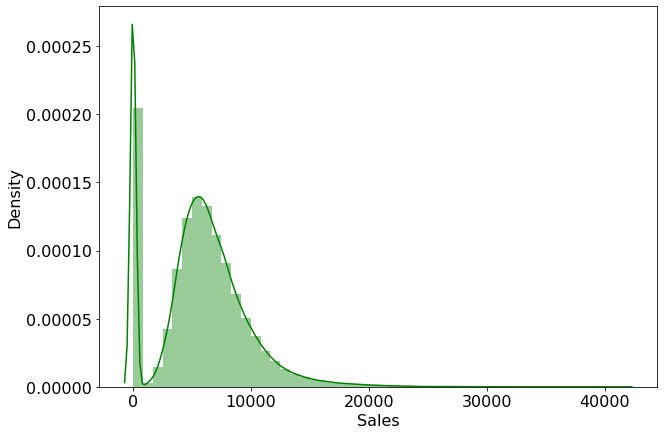

In [86]:
# Dependent variable 'Sales' distribution
plt.figure(figsize=(10,7))
plt.rcParams['font.size'] = '16'
sns.distplot(df['Sales'],color="g")

In [87]:
## make copy of date sets which having all values 

df_copy=df.copy()

In [88]:
# to check how many rows having 0 is sales column 
len(df_copy[df_copy['Sales']==0])

172871

In [89]:
#removing zeros  from Sales column 
df=df[df['Sales']>0]

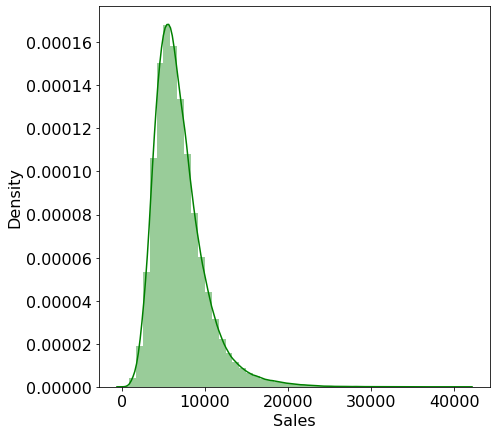

In [90]:
# after removing 0 values in sale distribution
plt.figure(figsize=(7,7))
sns.distplot(df['Sales'],color="g");

In [92]:
fix_col=['Sales','Customers','CompetitionDistance']
#Defining percentile range and calulating IQR
Q1 = df[fix_col].quantile(0.25)    #25% percentile
Q3 = df[fix_col].quantile(0.75)    #75% percentile
IQR = Q3 - Q1     #IQR (Inter Quartile Range)
print(IQR)

Sales                  3501.0
Customers               374.0
CompetitionDistance    6180.0
dtype: float64


In [93]:
df = df[~((df[fix_col] < (Q1 - 1.5 * IQR)) |(df[fix_col] > (Q3 + 1.5 * IQR))).any(axis=1)]
# after removing outlier to check description of data
df.describe()

,Store,DayOfWeek,Sales,Customers,Open,Promo,SchoolHoliday,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,year_of_sales,month_of_sales,day_of_sales
count,713769.000000,713769.000000,713769.000000,713769.000000,713769.0,713769.000000,713769.000000,713769.000000,713769.000000,713769.000000,713769.000000,713769.000000,713769.0,713769.000000,713769.000000,713769.000000
mean,557.160090,3.538431,6469.041340,696.045994,1.0,0.436695,0.192645,3515.150546,4.965643,1368.084237,0.533482,12.365159,1970.0,2013.832849,5.808573,15.861881
std,324.335318,1.708969,2311.230438,250.716405,0.0,0.495977,0.394377,3783.111008,4.315738,936.159654,0.498878,15.515798,0.0,0.778436,3.308818,8.645713
min,1.000000,1.000000,133.000000,18.000000,1.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1970.0,2013.000000,1.000000,1.000000
25%,277.000000,2.000000,4764.000000,511.000000,1.0,0.000000,0.000000,650.000000,0.000000,0.000000,0.000000,0.000000,1970.0,2013.000000,3.000000,8.000000
50%,555.000000,4.000000,6174.000000,657.000000,1.0,0.000000,0.000000,2100.000000,4.000000,2006.000000,1.000000,1.000000,1970.0,2014.000000,6.000000,16.000000
75%,844.000000,5.000000,7912.000000,850.000000,1.0,1.000000,0.000000,5000.000000,9.000000,2011.000000,1.000000,22.000000,1970.0,2014.000000,8.000000,23.000000
max,1115.000000,7.000000,13611.000000,1454.000000,1.0,1.000000,1.000000,15770.000000,12.000000,2015.000000,1.000000,50.000000,1970.0,2015.000000,12.000000,31.000000


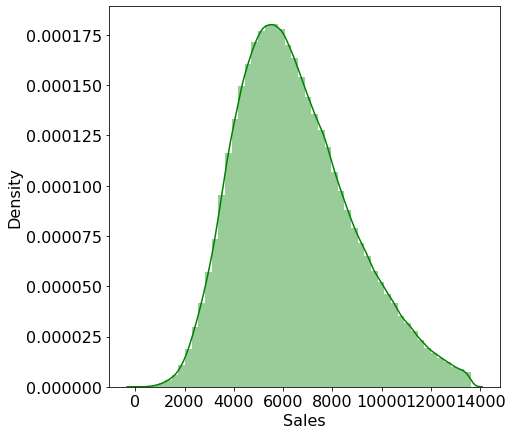

In [94]:
# after removing outlier  we can check the distribution of Sales column and result found quite normally distributed 
plt.figure(figsize=(7,7))
sns.distplot(df['Sales'],color="g");

In [95]:
#taking all numerical columns in our dataframe
numerical_columns=df.describe().columns
numerical_columns

Index(['Store', 'DayOfWeek', 'Sales', 'Customers', 'Open', 'Promo',
       'SchoolHoliday', 'CompetitionDistance', 'CompetitionOpenSinceMonth',
       'CompetitionOpenSinceYear', 'Promo2', 'Promo2SinceWeek',
       'Promo2SinceYear', 'year_of_sales', 'month_of_sales', 'day_of_sales'],
      dtype='object')

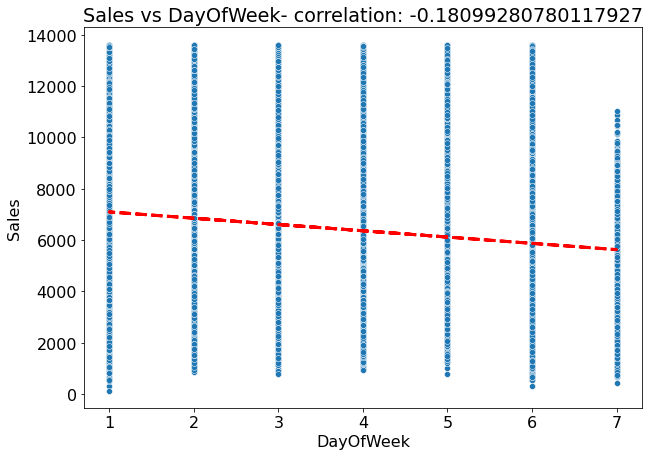

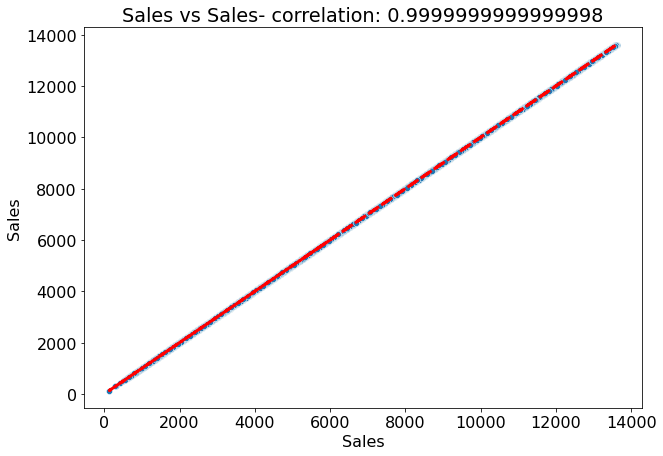

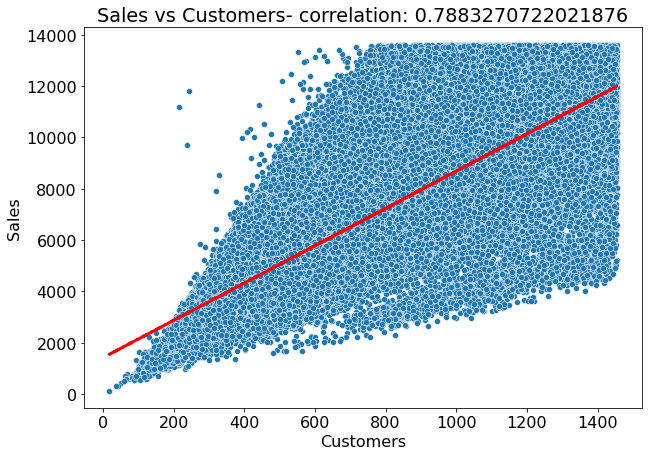

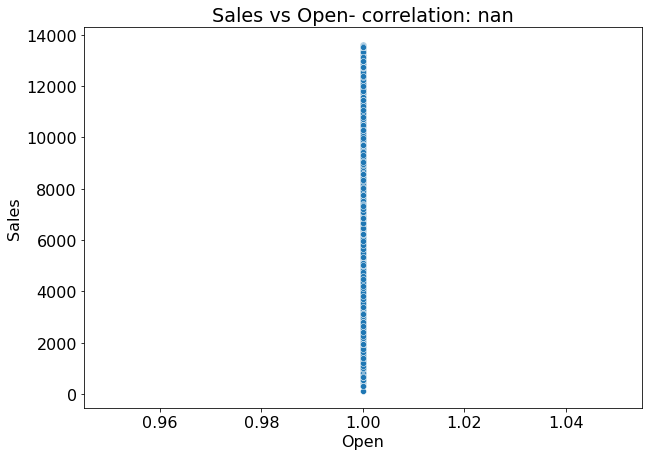

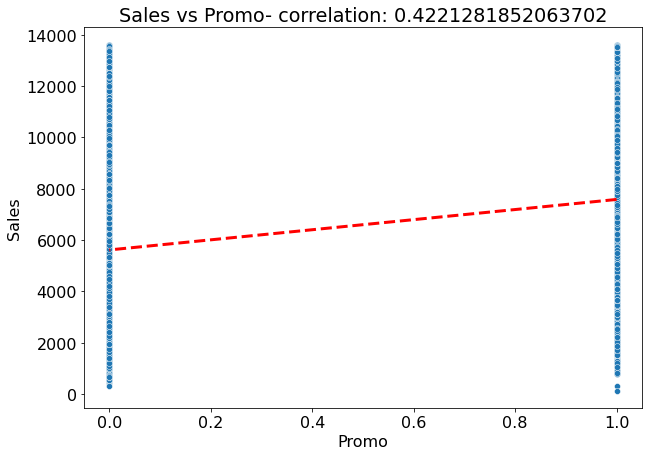

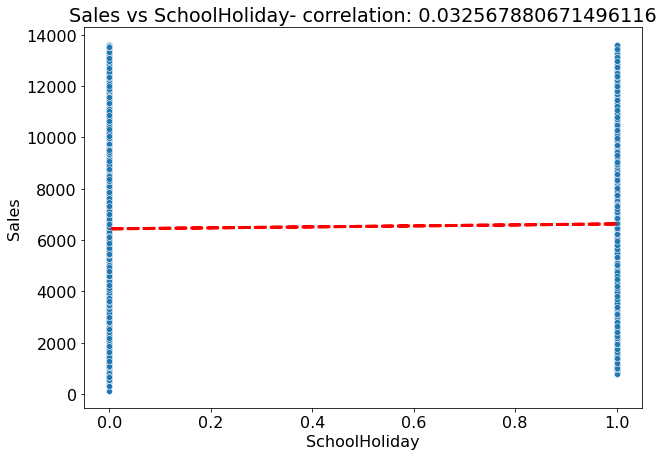

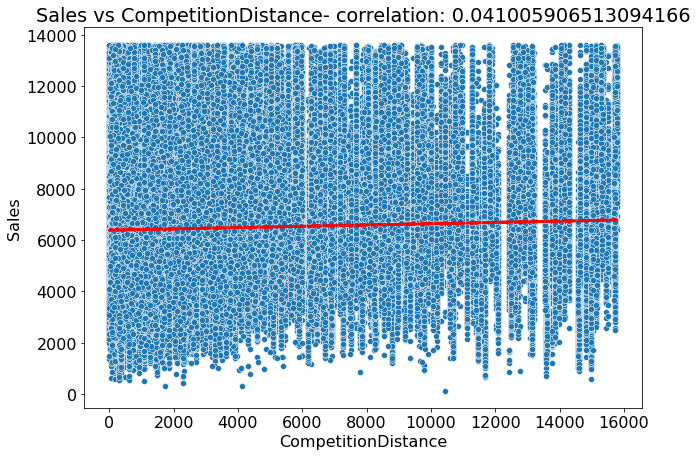

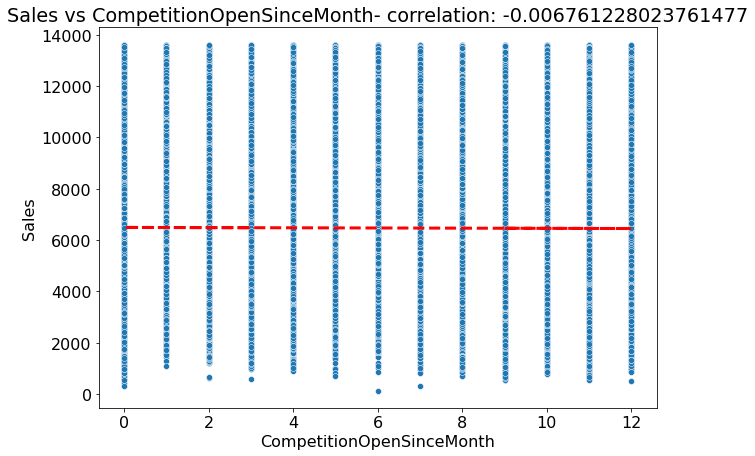

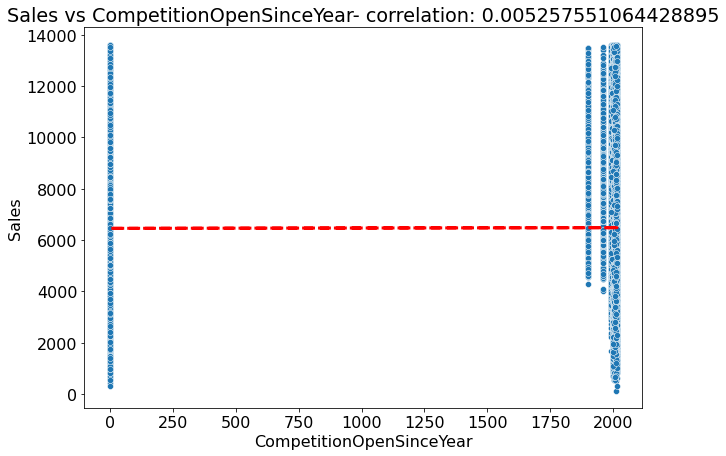

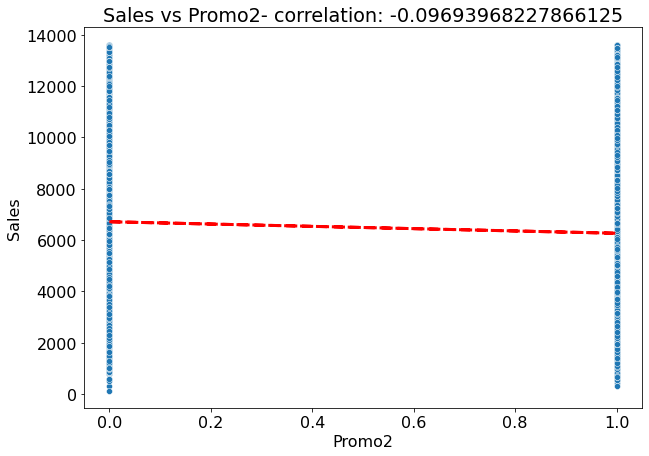

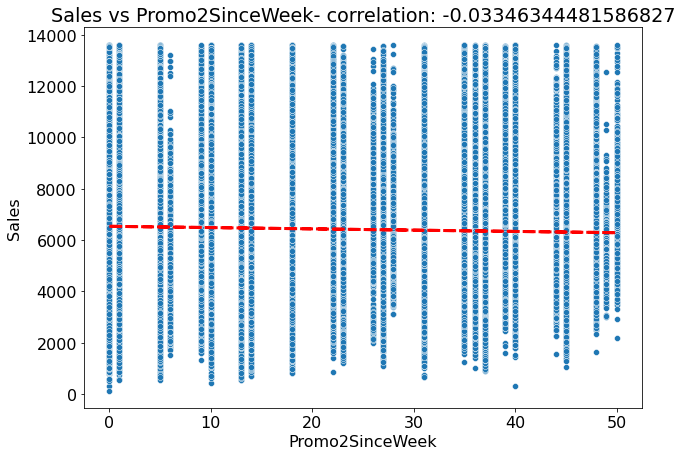

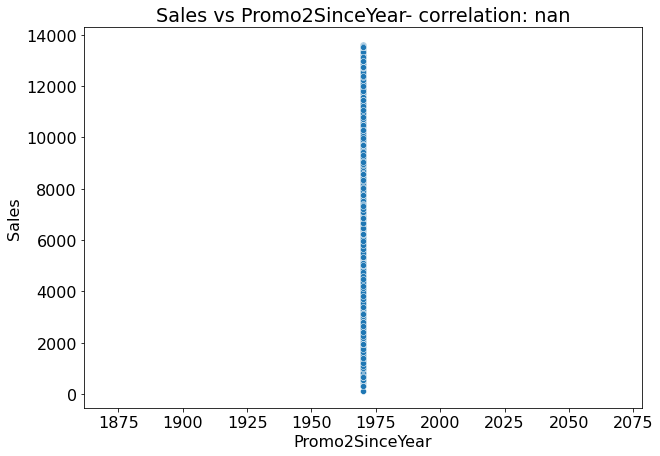

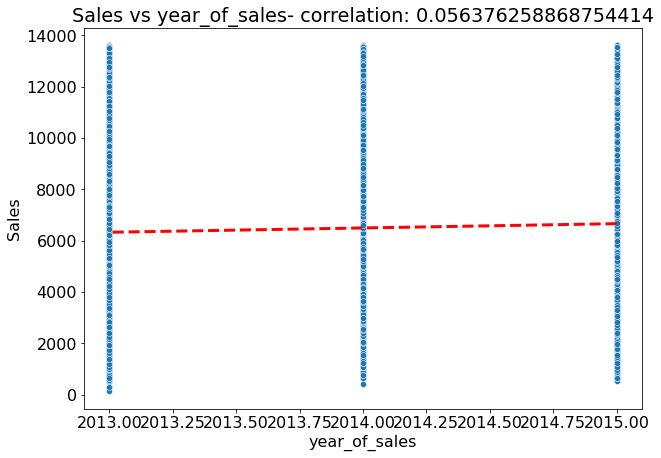

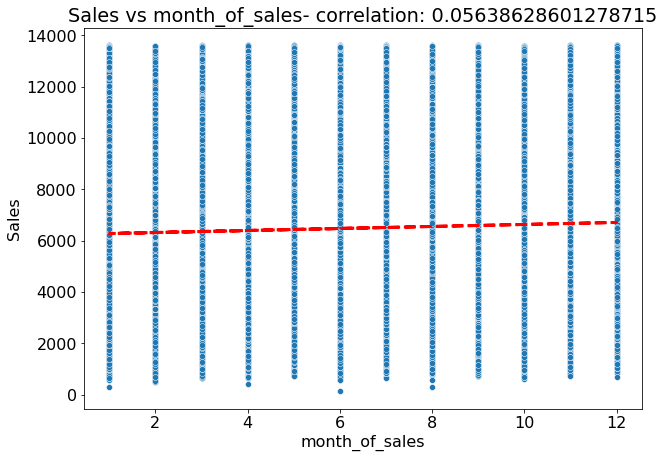

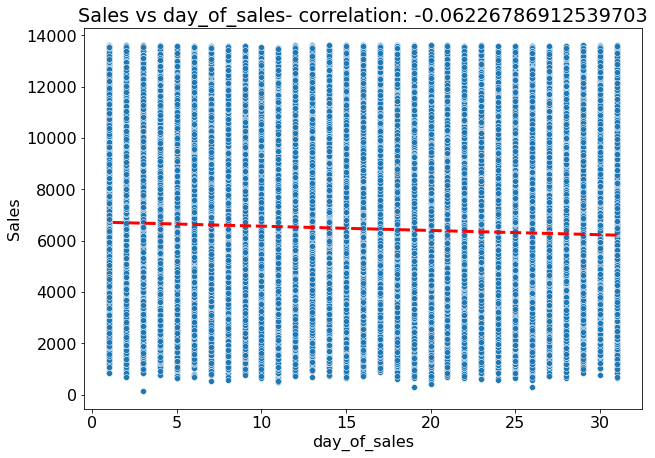

In [96]:
# scater plot with corelation between sales and numerical columns and its distribution
for i in numerical_columns[1:]:
   plt.figure(figsize = (10,7))
   plt.rcParams['font.size'] = '16'
   feature = df[i]
   label = df['Sales']
   
   correlation = feature.corr(label)
   sns.scatterplot(x=i,y = df['Sales'],data = df)
   plt.title('Sales vs ' + i + '- correlation: ' + str(correlation))
   z = np.polyfit(df[i], df['Sales'], 1)
   slope = np.poly1d(z)(df[i])

   plt.plot(df[i], slope, "r--", lw=3)

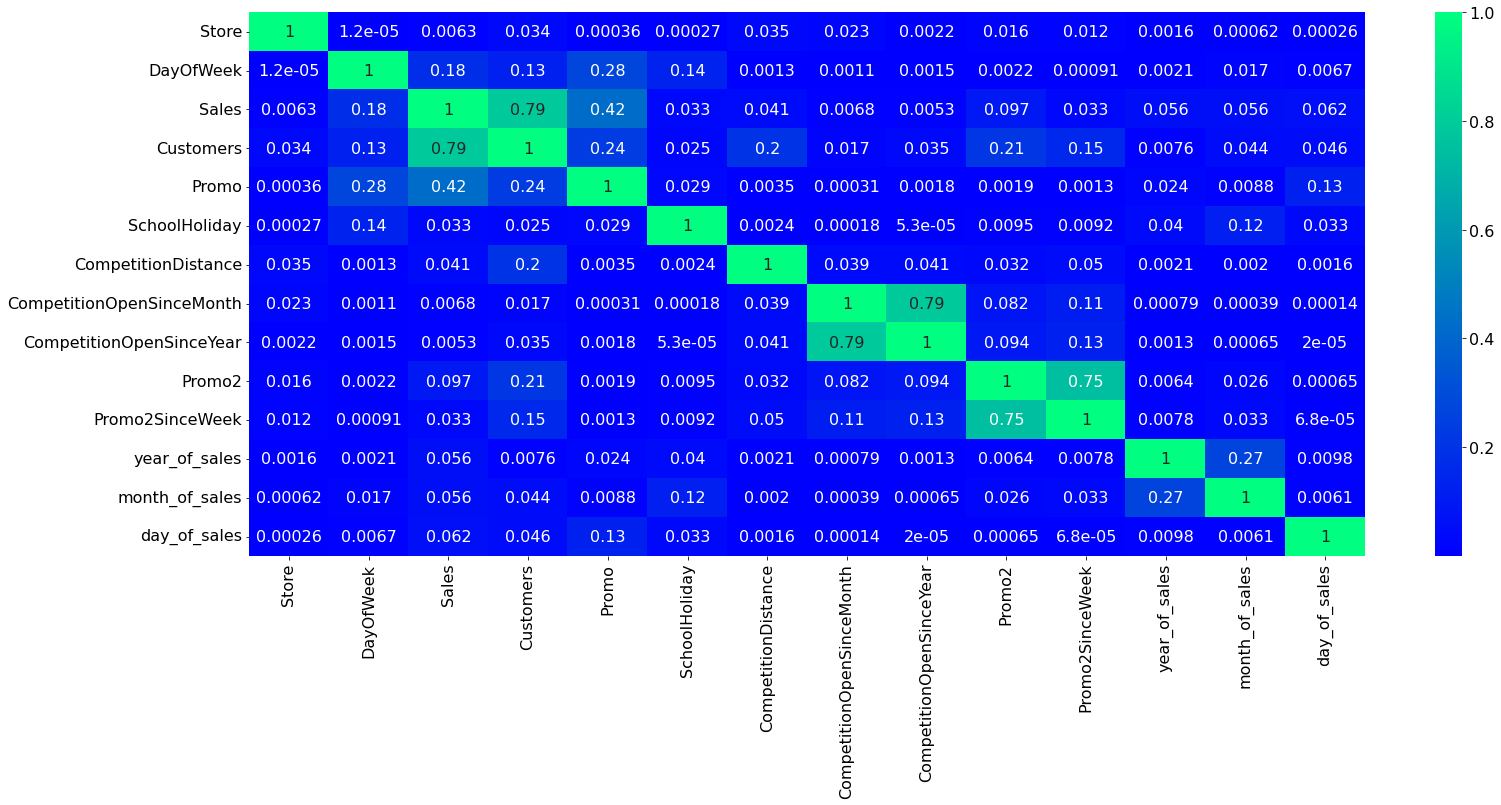

In [97]:
# correlation matrix, shown by heatmap
plt.figure(figsize=(25,10))
plt.rcParams['font.size'] = '16'

correlation = df.drop(['Open','Promo2SinceYear'],axis=1).corr() #heatmap had problems so we dropped some columns
sns.heatmap(abs(correlation), annot=True, cmap='winter',fmt='.2g')

In [98]:
# checking Multicollinearity
from statsmodels.stats.outliers_influence import variance_inflation_factor
def calc_vif(X):

    # Calculating VIF
    vif = pd.DataFrame()
    vif["variables"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

    return(vif)

In [99]:
calc_vif(df[[i for i in df.describe().columns if i not in ['Sales']]])

,variables,VIF
0,Store,1.004141
1,DayOfWeek,1.109107
2,Customers,1.178647
3,Open,0.000000
4,Promo,1.158751
5,SchoolHoliday,1.036152
6,CompetitionDistance,1.054894
7,CompetitionOpenSinceMonth,2.635701
8,CompetitionOpenSinceYear,2.642853
9,Promo2,2.306729


In [100]:
### Data encoding #'StateHoliday', 'StoreType', 'Assortment', 'PromoInterval'

#label encoding
encoders_nums = {"StateHoliday":{"0":0,"a":1,"b":2,"c":3},
                 "StoreType":{"a":1,"b":2,"c":3,"d":4},
                 "Assortment":{"a": 1, "b": 2,"c":3},
                 "PromoInterval":{"0":0,"Jan,Apr,Jul,Oct":1,"Feb,May,Aug,Nov":2,"Mar,Jun,Sept,Dec":3},
                }

df= df.replace(encoders_nums)

In [101]:
#Checking datadrame after encoding
df.head()

,Store,DayOfWeek,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval,year_of_sales,month_of_sales,day_of_sales
0,1,5,5263,555,1,1,0,1,3,1,1270.0,9,2008,0,0,1970,0,2015,7,31
1,2,5,6064,625,1,1,0,1,1,1,570.0,11,2007,1,13,1970,1,2015,7,31
2,3,5,8314,821,1,1,0,1,1,1,14130.0,12,2006,1,14,1970,1,2015,7,31
5,6,5,5651,589,1,1,0,1,1,1,310.0,12,2013,0,0,1970,0,2015,7,31
7,8,5,8492,833,1,1,0,1,1,1,7520.0,10,2014,0,0,1970,0,2015,7,31


In [102]:
#Normalization/scaling of data - understanding scaling
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(df)
scaled_data

array([[0.00000000e+00, 6.66666667e-01, 3.80620270e-01, ...,
        1.00000000e+00, 5.45454545e-01, 1.00000000e+00],
       [8.97666068e-04, 6.66666667e-01, 4.40050453e-01, ...,
        1.00000000e+00, 5.45454545e-01, 1.00000000e+00],
       [1.79533214e-03, 6.66666667e-01, 6.06989168e-01, ...,
        1.00000000e+00, 5.45454545e-01, 1.00000000e+00],
       ...,
       [6.89407540e-01, 1.66666667e-01, 3.63703814e-01, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [8.50089767e-01, 1.66666667e-01, 3.23341742e-01, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [9.83842011e-01, 1.66666667e-01, 4.32408369e-01, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00]])

In [103]:
#converting data back to pandas dataframe
df_scaled = pd.DataFrame(scaled_data)
df_scaled.columns = df.columns

In [104]:
from scipy.stats import zscore
from sklearn.linear_model import Lasso, Ridge
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import r2_score as r2, mean_squared_error 
import math
from sklearn.ensemble import RandomForestRegressor
import lightgbm as lgb
from sklearn.metrics import r2_score
from sklearn.metrics import confusion_matrix,classification_report

In [105]:
df.columns

Index(['Store', 'DayOfWeek', 'Sales', 'Customers', 'Open', 'Promo',
       'StateHoliday', 'SchoolHoliday', 'StoreType', 'Assortment',
       'CompetitionDistance', 'CompetitionOpenSinceMonth',
       'CompetitionOpenSinceYear', 'Promo2', 'Promo2SinceWeek',
       'Promo2SinceYear', 'PromoInterval', 'year_of_sales', 'month_of_sales',
       'day_of_sales'],
      dtype='object')

In [106]:
# defining X as idependent variable and y as dependent variable for our model
X = df_scaled.drop(['Sales','Store','Promo2SinceYear'],axis = 1) # dropping few columns which are not necessary
y = df_scaled['Sales']

In [107]:
# Train test split 
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

# Linear Regression

In [108]:
#Importing neccesary packages
from sklearn.linear_model import LinearRegression
from sklearn import metrics
print(X_train.shape)
print(X_test.shape)

(571015, 17)
(142754, 17)


In [109]:
#defining variable for linear regression
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

In [110]:
##Checking accuracy on train data
accuracy = lr.score(X_train,y_train)
print(accuracy*100,'%')

76.2636735517083 %


In [111]:
#Checking accuracy on test data
accuracy = lr.score(X_test,y_test)
print(accuracy*100,'%')

76.28604956078402 %


In [112]:
#predicting on test data
y_pred = lr.predict(X_test)
metrics.r2_score(y_pred,y_test)

0.6904198040625865

# Lasso Regression

In [114]:
from sklearn.linear_model import Lasso
lasso  = Lasso(alpha=0.02 , max_iter= 1000)

lasso.fit(X_train, y_train)

Lasso(alpha=0.02)

In [115]:
#predicting on train data
y_train_pred = lasso.predict(X_train)
#Evaluation Metrics
print("RMSE:",np.sqrt(mean_squared_error(y_train,y_train_pred)))
print("R-Square: " ,r2_score(y_train,y_train_pred))

RMSE: 0.15077087547225698
R-Square:  0.22641964930000846


In [117]:
#predicting on test data
y_test_pred = lasso.predict(X_test)
#Evaluation Metrics
print("RMSE:",np.sqrt(mean_squared_error(y_test,y_test_pred)))

#RMPSE=np.sqrt(mean_squared_error(y_test,y_test_pred))/sales_mean    
#print("RMPSE :",RMPSE)

print("R2-Score: ",r2_score(y_test,y_test_pred))

RMSE: 0.1508990140297401
R2-Score:  0.22781999723088187
